In [ ]:
!pip install fiftyone

#Download 'cup' class from COCO dataset

In [ ]:
import fiftyone as fo
import fiftyone.zoo as foz
import os

# Load the COCO dataset from FiftyOne
dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="validation",
    label_types=["detections", "segmentations"],
    classes=["cup"],
    #max_samples=100,
)

# Define the directory to save the dataset
save_dir = "/home/amitabha/Downloads/coco-single/"

if not os.path.exists(save_dir):
    os.makedirs(save_dir)

dataset.export(
    export_dir=save_dir,
    dataset_type=fo.types.COCODetectionDataset,
)

print("Dataset downloaded and saved to:", save_dir)

# Load and display the images and coco annotations

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


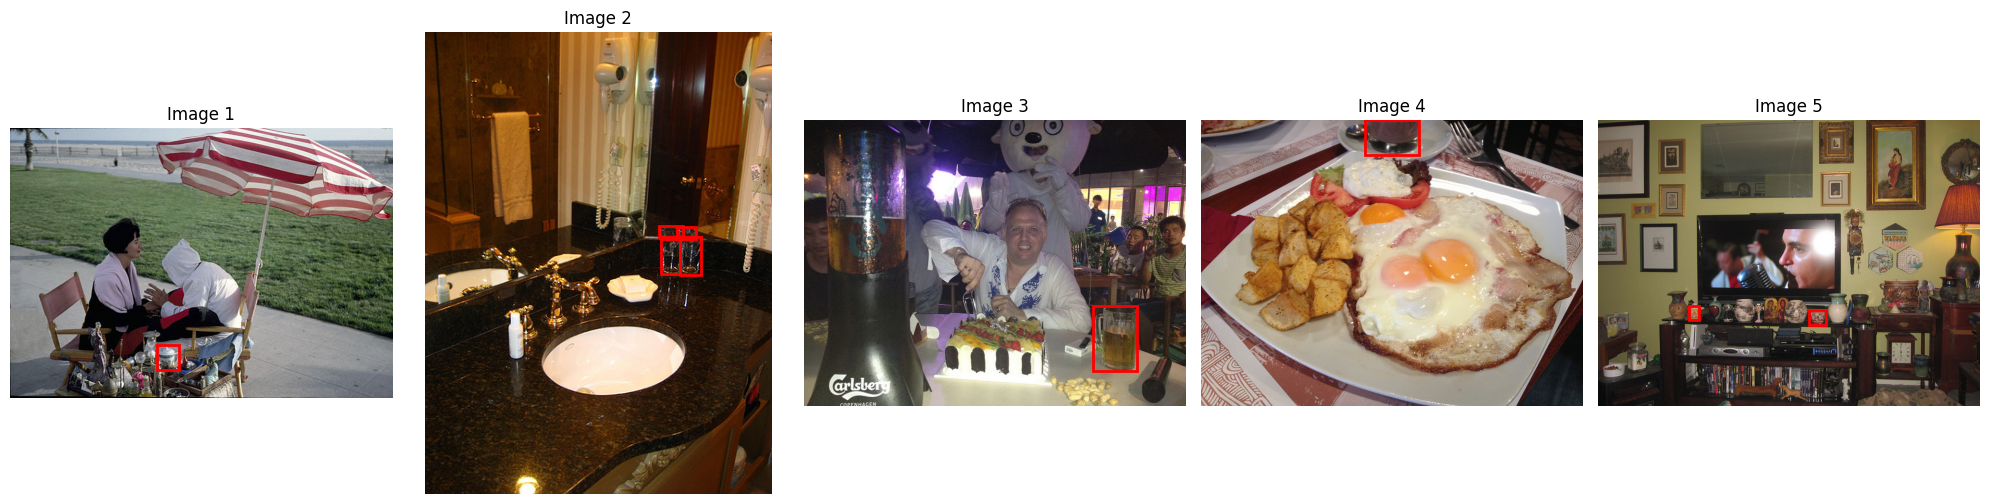

In [ ]:

import os
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from pycocotools.coco import COCO
import torchvision.transforms as transforms
from PIL import Image

# Set the paths to the COCO dataset
coco_root = '/home/amitabha/Downloads/coco-single/val/'
annFile = os.path.join(coco_root, 'val.json')

coco = COCO(annFile)

cat_ids = coco.getCatIds(catNms=['cup'])
cat_id = cat_ids[0]

img_ids = coco.getImgIds(catIds=cat_id)

random_img_ids = random.sample(img_ids, 5)


fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for idx, img_id in enumerate(random_img_ids):
    img_info = coco.loadImgs(img_id)[0]
    img_path = os.path.join(coco_root, img_info['file_name'])
    image = Image.open(img_path).convert('RGB')

    ann_ids = coco.getAnnIds(imgIds=img_id, catIds=cat_id)
    anns = coco.loadAnns(ann_ids)

    ax = axes[idx]
    ax.imshow(image)
    ax.set_title(f'Image {idx+1}')
    ax.axis('off')

    for ann in anns:
        bbox = ann['bbox']
        x, y, w, h = [int(v) for v in bbox]
        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

plt.tight_layout()
plt.show()

# Write the annotations in YOLO format

In [ ]:

import os
from pycocotools.coco import COCO

# Set the paths to the COCO dataset
coco_root = '/home/amitabha/Downloads/coco-single/train/images'
annFile = os.path.join(coco_root, 'train.json')

coco = COCO(annFile)

cat_ids = coco.getCatIds(catNms=['cup'])
cat_id = cat_ids[0]

img_ids = coco.getImgIds(catIds=cat_id)

annotations_dir = os.path.join(coco_root, 'annotations')
os.makedirs(annotations_dir, exist_ok=True)

for img_id in img_ids:
    img_info = coco.loadImgs(img_id)[0]
    img_width = img_info['width']
    img_height = img_info['height']

    ann_ids = coco.getAnnIds(imgIds=img_id, catIds=cat_id)
    anns = coco.loadAnns(ann_ids)

    annotation_filename = os.path.join(annotations_dir, f"{img_info['file_name'].split('.')[0]}.txt")
    with open(annotation_filename, "w") as f:
        for ann in anns:
            bbox = ann['bbox']
            x_center = (bbox[0] + bbox[2] / 2) / img_width
            y_center = (bbox[1] + bbox[3] / 2) / img_height
            width = bbox[2] / img_width
            height = bbox[3] / img_height
            f.write(f"0 {x_center} {y_center} {width} {height}\n")

print("Annotations written in YOLO format for all images.")


loading annotations into memory...
Done (t=0.75s)
creating index...
index created!
Annotations written in YOLO format for all images.


# Load and display the images with YOLO annotations


loading annotations into memory...
Done (t=0.61s)
creating index...
index created!


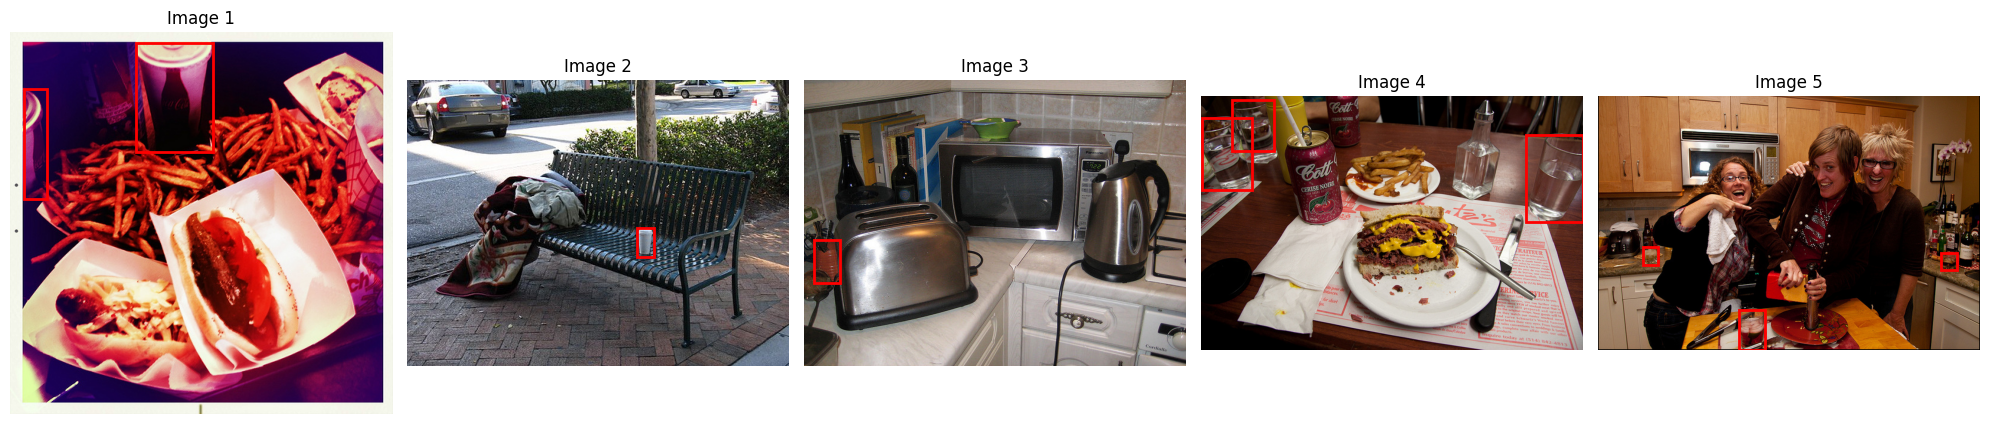

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from pycocotools.coco import COCO
from PIL import Image

# Set the paths to the images and annotataions
coco_root = '/home/amitabha/Downloads/coco-single/train/images/'
annFile = os.path.join(coco_root, 'train.json')
annotations_dir = os.path.join(coco_root, 'annotations')
img_dir = os.path.join(coco_root)


coco = COCO(annFile)

cat_ids = coco.getCatIds(catNms=['cup'])
cat_id = cat_ids[0]

img_ids = coco.getImgIds(catIds=cat_id)

random_img_ids = random.sample(img_ids, 5)


fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for idx, img_id in enumerate(random_img_ids):
    img_info = coco.loadImgs(img_id)[0]
    img_filename = img_info['file_name']
    img_path = os.path.join(img_dir, img_filename)
    image = Image.open(img_path).convert('RGB')
    img_width, img_height = image.size

    # Load the YOLO annotations
    annotation_filename = os.path.splitext(img_filename)[0] + ".txt"
    annotation_path = os.path.join(annotations_dir, annotation_filename)
    with open(annotation_path, "r") as f:
        annotations = f.readlines()

    # Draw the bounding boxes on the image
    ax = axes[idx]
    ax.imshow(image)
    ax.set_title(f'Image {idx+1}')
    ax.axis('off')

    for annotation in annotations:
        label, x_center, y_center, width, height = map(float, annotation.strip().split())
        x = x_center - width / 2
        y = y_center - height / 2
        w = width * img_width
        h = height * img_height
        rect = patches.Rectangle((x * img_width, y * img_height), w, h, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

plt.tight_layout()
plt.show()

# Parse the YOLO annotations and count the classes


In [ ]:
import os

def count_classes_from_yolo_labels(labels_folder):
    class_counts = {}

    for label_file in os.listdir(labels_folder):
        if label_file.endswith('.txt'):
            with open(os.path.join(labels_folder, label_file), 'r') as f:
                lines = f.readlines()


            for line in lines:
                class_id = int(line.split()[0])
                class_counts[class_id] = class_counts.get(class_id, 0) + 1

    return class_counts

labels_folder = '/home/amitabha/Downloads/COU/yolo/labels/train/'
class_counts = count_classes_from_yolo_labels(labels_folder)
print("Class Counts:")
for class_id, count in class_counts.items():
    print(f"Class ID: {class_id}, Count: {count}")


Class Counts:
Class ID: 0, Count: 113653
